In [2]:
import pandas as pd

# Assuming the dataset is in CSV format
df = pd.read_csv('/content/News_Category_Dataset_v3.csv')
df = df.sample(frac=0.5, random_state=1)
# print(df.head())
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 104764 entries, 161038 to 157487
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                104764 non-null  int64 
 1   headline                  104760 non-null  object
 2   category                  104764 non-null  object
 3   short_description         94807 non-null   object
 4   authors                   85950 non-null   object
 5   date                      104764 non-null  object
 6   headline_length           104764 non-null  int64 
 7   short_description_length  104764 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 7.2+ MB
None


In [3]:
# Count the number of categories
category_counts = df['category'].value_counts()
category_counts

POLITICS          17793
WELLNESS           8880
ENTERTAINMENT      8752
STYLE & BEAUTY     5033
TRAVEL             5031
PARENTING          4268
HEALTHY LIVING     3376
QUEER VOICES       3190
FOOD & DRINK       3175
BUSINESS           3035
COMEDY             2708
SPORTS             2602
BLACK VOICES       2262
HOME & LIVING      2071
PARENTS            1969
WOMEN              1828
WEDDINGS           1821
THE WORLDPOST      1819
CRIME              1787
IMPACT             1746
DIVORCE            1684
WORLD NEWS         1668
MEDIA              1455
WEIRD NEWS         1396
GREEN              1300
WORLDPOST          1288
RELIGION           1244
STYLE              1178
SCIENCE            1108
TECH               1074
TASTE              1044
MONEY               855
ENVIRONMENT         736
ARTS                727
GOOD NEWS           698
U.S. NEWS           697
FIFTY               663
ARTS & CULTURE      637
COLLEGE             575
LATINO VOICES       546
CULTURE & ARTS      544
EDUCATION       

In [4]:
unique_value_count = df['category'].nunique()
unique_value_count

42

In [5]:
df = df.drop('Unnamed: 0', axis=1)
# Or set it as index if it is a unique identifier
# df.set_index('Unnamed: 0', inplace=True)
# print(df.head())
df['headline']

161038    As Pay Cards Replace Paychecks, Bank Fees Hurt...
24711     Aung San Suu Kyi's Speech On The Rohingya Cris...
54649     Calls To Decriminalize Sex Work Are Growing Lo...
199823    FICO 8, Not FICO, Is Used In Recent Credit Com...
19088     18-Year-Old Confesses To Molesting 'Upwards Of...
                                ...                        
81002     Kitson, Young Hollywood's Favorite Mid-2000s P...
15907     Here's What's Happening With The Dreamer Progr...
78489     ICYMI: Why Men Grow Beards And When Self-Care ...
35899             I Was An Activist In College. I Still Am.
157487    Chrissy Teigen ‏To Become 'The Padma Of Snacks...
Name: headline, Length: 104764, dtype: object

In [6]:
# Count the number of categories and get the top 10
category_counts = df['category'].value_counts()
top_10_categories = category_counts.head(10).index.tolist()

# Filter the DataFrame to keep only rows with top 10 categories
df_top_10 = df[df['category'].isin(top_10_categories)]

# Display information about the modified DataFrame
print(df_top_10.info())

# Optional: Display the count of categories now
print(df_top_10['category'].value_counts())

# Print the number of unique categories in the filtered DataFrame
unique_value_count = df_top_10['category'].nunique()
print("Number of unique categories in the top 10:", unique_value_count)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62533 entries, 161038 to 157487
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   headline                  62532 non-null  object
 1   category                  62533 non-null  object
 2   short_description         57822 non-null  object
 3   authors                   52070 non-null  object
 4   date                      62533 non-null  object
 5   headline_length           62533 non-null  int64 
 6   short_description_length  62533 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.8+ MB
None
POLITICS          17793
WELLNESS           8880
ENTERTAINMENT      8752
STYLE & BEAUTY     5033
TRAVEL             5031
PARENTING          4268
HEALTHY LIVING     3376
QUEER VOICES       3190
FOOD & DRINK       3175
BUSINESS           3035
Name: category, dtype: int64
Number of unique categories in the top 10: 10


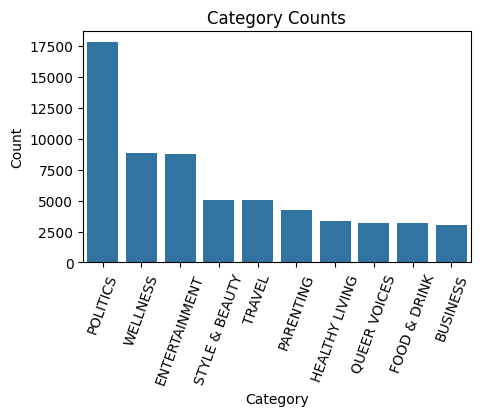

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = df_top_10['category'].value_counts()

# Create a bar plot (histogram) of the category counts using seaborn
plt.figure(figsize=(5, 3))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts')
plt.xticks(rotation=70)
plt.show()

In [8]:
df_top_10

,headline,category,short_description,authors,date,headline_length,short_description_length
161038,"As Pay Cards Replace Paychecks, Bank Fees Hurt...",BUSINESS,A growing number of American workers are confr...,NaN,2013-06-30,68,125
102059,Education Department Nears Deal With Student L...,POLITICS,NaN,Shahien Nasiripour,2015-04-17,76,0
112898,Democratic Lawyer Crafted Deal That Would Obli...,POLITICS,NaN,NaN,2014-12-13,81,0
33789,Trump Remains Silent On LGBTQ Pride Month,QUEER VOICES,Deafening silence from the supposed “most gay-...,James Michael Nichols,2017-06-01,41,94
164074,Ronda (and Gibraltor) --Two Friends in Andalus...,TRAVEL,"After arriving in Ronda, we walked to the Hote...","Fahad Faruqui, Contributor\nWriter. Presenter....",2013-05-28,56,192
...,...,...,...,...,...,...,...
49122,Donald Trump Chooses Fast-Food CEO To Be His L...,POLITICS,The man who's helmed Hardee's and Carl's Jr. c...,Dave Jamieson,2016-12-08,60,123
81002,"Kitson, Young Hollywood's Favorite Mid-2000s P...",ENTERTAINMENT,RIP Kitson.,Stephanie Marcus,2015-12-11,65,11
15907,Here's What's Happening With The Dreamer Progr...,POLITICS,Republicans argue it's not that urgent to find...,Elise Foley,2018-01-20,79,116
78489,ICYMI: Why Men Grow Beards And When Self-Care ...,HEALTHY LIVING,Health stories you may have missed this week.,Erin Schumaker,2016-01-09,56,45


In [9]:
pip install nltk

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import nltk

# Download stopwords from NLTK
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Check if the text is a string
    if not isinstance(text, str):
        return text

    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    # Remove stopwords
    tokens = word_tokenize(text)
    filtered_text = ' '.join([word for word in tokens if word not in stop_words])
    return filtered_text


# Applying the preprocess function to each row of the headline and short description
df_top_10['cleaned_headline'] = df_top_10['headline'].apply(preprocess_text)
df_top_10['cleaned_short_description'] = df_top_10['short_description'].apply(preprocess_text)
df_top_10
# print(df.head())

# # Vectorization with TF-IDF
# vectorizer = TfidfVectorizer(ngram_range=(1, 2))
# features = vectorizer.fit_transform(df['cleaned_headline'] + ' ' + df['cleaned_short_description'])
# features


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-10-4ecc19077767>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['cleaned_headline'] = df_top_10['headline'].apply(preprocess_text)
<ipython-input-10-4ecc19077767>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['cleaned_short_description'] = df_top_10['sh

,headline,category,short_description,authors,date,headline_length,short_description_length,cleaned_headline,cleaned_short_description
161038,"As Pay Cards Replace Paychecks, Bank Fees Hurt...",BUSINESS,A growing number of American workers are confr...,NaN,2013-06-30,68,125,pay cards replace paychecks bank fees hurt wor...,growing number american workers confronting fr...
102059,Education Department Nears Deal With Student L...,POLITICS,NaN,Shahien Nasiripour,2015-04-17,76,0,education department nears deal student loan g...,NaN
112898,Democratic Lawyer Crafted Deal That Would Obli...,POLITICS,NaN,NaN,2014-12-13,81,0,democratic lawyer crafted deal would obliterat...,NaN
33789,Trump Remains Silent On LGBTQ Pride Month,QUEER VOICES,Deafening silence from the supposed “most gay-...,James Michael Nichols,2017-06-01,41,94,trump remains silent lgbtq pride month,deafening silence supposed gay friendly republ...
164074,Ronda (and Gibraltor) --Two Friends in Andalus...,TRAVEL,"After arriving in Ronda, we walked to the Hote...","Fahad Faruqui, Contributor\nWriter. Presenter....",2013-05-28,56,192,ronda gibraltor two friends andalusia part,arriving ronda walked hotel san francisco mode...
...,...,...,...,...,...,...,...,...,...
49122,Donald Trump Chooses Fast-Food CEO To Be His L...,POLITICS,The man who's helmed Hardee's and Carl's Jr. c...,Dave Jamieson,2016-12-08,60,123,donald trump chooses fast food ceo labor secre...,man helmed hardee carl jr could become nation ...
81002,"Kitson, Young Hollywood's Favorite Mid-2000s P...",ENTERTAINMENT,RIP Kitson.,Stephanie Marcus,2015-12-11,65,11,kitson young hollywood favorite mid photo op c...,rip kitson
15907,Here's What's Happening With The Dreamer Progr...,POLITICS,Republicans argue it's not that urgent to find...,Elise Foley,2018-01-20,79,116,happening dreamer program helped lead shutdown,republicans argue urgent find fix claims nothi...
78489,ICYMI: Why Men Grow Beards And When Self-Care ...,HEALTHY LIVING,Health stories you may have missed this week.,Erin Schumaker,2016-01-09,56,45,icymi men grow beards self care goes wrong,health stories may missed week


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(ngram_range=(1, 1))
vectorizer = TfidfVectorizer(ngram_range=(1,1),max_df=0.85, min_df=100)        # Ignore terms that have a document frequency higher than 85%
                                                                              # Using unigrams and bigrams

# Combine cleaned headline and short description for vectorization
df_top_10['combined_text'] = df_top_10['cleaned_headline'] + ' ' + df_top_10['cleaned_short_description']
df_top_10['combined_text'] = df_top_10['combined_text'].fillna('')

# Fit and transform the combined text
feature_vector = vectorizer.fit_transform(df_top_10['combined_text'])


<ipython-input-11-53988b417a69>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['combined_text'] = df_top_10['cleaned_headline'] + ' ' + df_top_10['cleaned_short_description']
<ipython-input-11-53988b417a69>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['combined_text'] = df_top_10['combined_text'].fillna('')


In [12]:
# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Print the number of features (tokens)
print("Number of features:", len(feature_names))

# Print the first 100 features'
print(f"First 100 features: \n{feature_names[0:100]}")

Number of features: 1937
First 100 features: 
['ability' 'able' 'abortion' 'abroad' 'absolutely' 'abuse' 'accept'
 'access' 'according' 'accused' 'achieve' 'across' 'act' 'action'
 'actions' 'active' 'activists' 'activities' 'activity' 'actor' 'actress'
 'actual' 'actually' 'ad' 'add' 'added' 'addiction' 'address'
 'administration' 'admit' 'adorable' 'ads' 'adult' 'adults' 'adventure'
 'advice' 'adviser' 'affect' 'affordable' 'afraid' 'african' 'age'
 'agency' 'agenda' 'ago' 'agree' 'ahead' 'air' 'airline' 'airlines'
 'airport' 'album' 'alcohol' 'alive' 'allegations' 'allegedly' 'allow'
 'allowed' 'almost' 'alone' 'along' 'already' 'also' 'although' 'always'
 'amazing' 'america' 'american' 'americans' 'amid' 'among' 'amount' 'amy'
 'angeles' 'anger' 'anniversary' 'announced' 'annual' 'another' 'answer'
 'answers' 'anti' 'anxiety' 'anymore' 'anyone' 'anything' 'anyway' 'apart'
 'apparently' 'appear' 'appearance' 'appeared' 'appears' 'apple'
 'approach' 'april' 'area' 'areas' 'arizona' '

In [13]:
dtm = pd.DataFrame(feature_vector.toarray(), columns=feature_names)
dtm

,ability,able,abortion,abroad,absolutely,abuse,accept,access,according,accused,...,wrong,wrote,year,years,yes,yet,yoga,york,young,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
62529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.493166,0.0
62530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
62531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.306045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


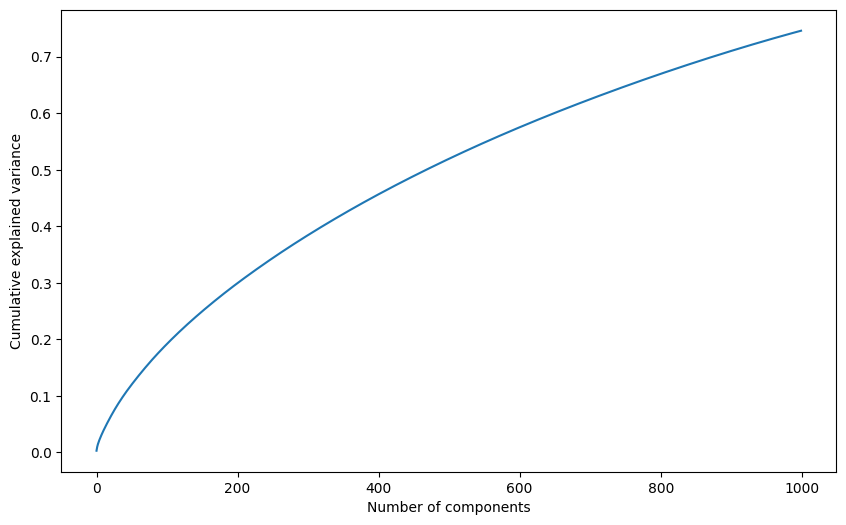

In [14]:
import numpy as np

from sklearn.decomposition import TruncatedSVD
# Example with TruncatedSVD
svd = TruncatedSVD(n_components=1000)  # Start with a larger number of components
reduced_data = svd.fit_transform(dtm)

# Plot the cumulative explained variance
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
n_components = 80  # Number of components to keep
svd = TruncatedSVD(n_components=n_components)
reduced_data = svd.fit_transform(dtm)
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")

Total variance explained: 0.84


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'category' is the target variable and 'tfidf_matrix' is your features matrix
X_train, X_test, y_train, y_test = train_test_split(
    feature_vector, df_top_10['category'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
log_reg_pred = log_reg.predict(X_test)

# Evaluate performance
log_reg_report = classification_report(y_test, log_reg_pred)
print("Logistic Regression Report:\n", log_reg_report)


Logistic Regression Report:
                 precision    recall  f1-score   support

      BUSINESS       0.65      0.36      0.46       623
 ENTERTAINMENT       0.72      0.63      0.67      1798
  FOOD & DRINK       0.79      0.66      0.72       640
HEALTHY LIVING       0.41      0.10      0.16       689
     PARENTING       0.70      0.66      0.68       829
      POLITICS       0.71      0.93      0.81      3509
  QUEER VOICES       0.86      0.55      0.67       621
STYLE & BEAUTY       0.84      0.81      0.83      1013
        TRAVEL       0.75      0.68      0.71      1004
      WELLNESS       0.63      0.80      0.71      1781

      accuracy                           0.71     12507
     macro avg       0.71      0.62      0.64     12507
  weighted avg       0.71      0.71      0.69     12507



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_clf.predict(X_test)

# Evaluate performance
rf_report = classification_report(y_test, rf_pred)
print("Random Forest Report:\n", rf_report)


Random Forest Report:
                 precision    recall  f1-score   support

      BUSINESS       0.64      0.26      0.37       623
 ENTERTAINMENT       0.64      0.55      0.59      1798
  FOOD & DRINK       0.68      0.65      0.67       640
HEALTHY LIVING       0.46      0.03      0.06       689
     PARENTING       0.67      0.68      0.67       829
      POLITICS       0.69      0.90      0.78      3509
  QUEER VOICES       0.89      0.53      0.67       621
STYLE & BEAUTY       0.78      0.80      0.79      1013
        TRAVEL       0.73      0.55      0.62      1004
      WELLNESS       0.56      0.79      0.65      1781

      accuracy                           0.67     12507
     macro avg       0.67      0.57      0.59     12507
  weighted avg       0.67      0.67      0.65     12507



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(df_top_10['category'])  # Fit on the original category data
encoded_Y_train = encoder.transform(y_train)  # Transform training labels
encoded_Y_test = encoder.transform(y_test)  # Transform test labels


In [ ]:
# from xgboost import XGBClassifier

# # Initialize and train the XGBoost classifier
# xgb_clf = XGBClassifier()
# xgb_clf.fit(X_train, y_train)

# # Predict on the test set
# xgb_pred = xgb_clf.predict(X_test)

# # Evaluate performance
# xgb_report = classification_report(y_test, xgb_pred)
# print("XGBoost Report:\n", xgb_report)

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize and train the XGBoost classifier with encoded labels
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, encoded_Y_train)

# Predict on the test set using encoded labels
xgb_pred = xgb_clf.predict(X_test)

# Since the predictions are in encoded form, use the inverse_transform method to get back to string labels for evaluation
xgb_pred_labels = encoder.inverse_transform(xgb_pred)
y_test_labels = encoder.inverse_transform(encoded_Y_test)

# Evaluate performance
xgb_report = classification_report(y_test_labels, xgb_pred_labels)
print("XGBoost Report:\n", xgb_report)



XGBoost Report:
                 precision    recall  f1-score   support

      BUSINESS       0.65      0.35      0.46       623
 ENTERTAINMENT       0.69      0.58      0.63      1798
  FOOD & DRINK       0.74      0.67      0.70       640
HEALTHY LIVING       0.41      0.08      0.13       689
     PARENTING       0.68      0.69      0.69       829
      POLITICS       0.67      0.92      0.77      3509
  QUEER VOICES       0.85      0.58      0.69       621
STYLE & BEAUTY       0.80      0.81      0.81      1013
        TRAVEL       0.75      0.62      0.68      1004
      WELLNESS       0.65      0.73      0.69      1781

      accuracy                           0.69     12507
     macro avg       0.69      0.60      0.62     12507
  weighted avg       0.68      0.69      0.67     12507



In [ ]:
from keras.utils import np_utils

# Convert integers to dummy (one-hot encoded) variables
y_train_one_hot = np_utils.to_categorical(encoded_Y_train)
y_test_one_hot = np_utils.to_categorical(encoded_Y_test)


2024-02-14 13:21:36.709360: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the ANN model
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(len(df_top_10['category'].unique()), activation='softmax'))  # Number of classes

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Fit the model to the training data
# ann_model.fit(X_train.toarray(), y_train, epochs=10, batch_size=128)

# # Evaluate the model on the test data
# ann_loss, ann_accuracy = ann_model.evaluate(X_test.toarray(), y_test)
# print("ANN Accuracy:", ann_accuracy)
# Fit the model to the training data
ann_model.fit(X_train.toarray(), y_train_one_hot, epochs=10, batch_size=128)

# Evaluate the model on the test data
ann_loss, ann_accuracy = ann_model.evaluate(X_test.toarray(), y_test_one_hot)
print("ANN Accuracy:", ann_accuracy)



2024-02-14 13:23:26.861696: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-14 13:23:26.862217: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2024-02-14 13:23:28.557581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-14 13:23:28.601723: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


391/391 [==============================] - 7s 16ms/step - loss: 1.3672 - accuracy: 0.5686
Epoch 2/10
391/391 [==============================] - 5s 14ms/step - loss: 0.8697 - accuracy: 0.7199
Epoch 3/10
391/391 [==============================] - 5s 13ms/step - loss: 0.8048 - accuracy: 0.7375
Epoch 4/10
391/391 [==============================] - 6s 14ms/step - loss: 0.7745 - accuracy: 0.7456
Epoch 5/10
391/391 [==============================] - 6s 14ms/step - loss: 0.7543 - accuracy: 0.7505
Epoch 6/10
391/391 [==============================] - 5s 14ms/step - loss: 0.7411 - accuracy: 0.7541
Epoch 7/10
391/391 [==============================] - 6s 14ms/step - loss: 0.7312 - accuracy: 0.7566
Epoch 8/10
391/391 [==============================] - 5s 14ms/step - loss: 0.7245 - accuracy: 0.7592
Epoch 9/10
391/391 [==============================] - 5s 13ms/step - loss: 0.7193 - accuracy: 0.7606
Epoch 10/10
 11/391 [..............................] - ETA: 4s - loss: 1.0733 - accuracy: 0.6648

2024-02-14 13:24:23.995695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 4s 11ms/step - loss: 0.9483 - accuracy: 0.6976
ANN Accuracy: 0.6976093649864197


In [ ]:
from keras.preprocessing.text import Tokenizer

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=10000)  # num_words is the maximum number of words to keep, based on word frequency

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(df_top_10['combined_text'])

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(df_top_10['combined_text'])

# The tokenizer provides a word index dictionary mapping words to integers
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')


2024-02-06 20:16:16.099264: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 49719 unique tokens.


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you've already defined 'sequences'
# Pad sequences to ensure uniform length, choosing a max length
max_length = max([len(seq) for seq in sequences])  # You can choose a different strategy for setting max_length

# Pad the sequences
data = pad_sequences(sequences, maxlen=max_length)

print(f'Shape of data tensor: {data.shape}')



Shape of data tensor: (62533, 126)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded integer labels
labels_encoded = label_encoder.fit_transform(df_top_10['category'])

# Convert integers to one-hot encoded labels
labels_one_hot = np_utils.to_categorical(labels_encoded)

print(f'Shape of label tensor: {labels_one_hot.shape}')


Shape of label tensor: (62533, 10)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a testing set
X_train, X_test, y_train_one_hot, y_test_one_hot = train_test_split(data, labels_one_hot, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train_one_hot.shape, y_test_one_hot.shape)


(50026, 126) (12507, 126) (50026, 10) (12507, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Assuming max_length is the uniform length of your padded sequences
# and vocab_size is the size of your vocabulary
max_length = 126  # Example max length of sequences
vocab_size = 10000  # Example vocabulary size
embedding_dim = 50  # Dimensionality of the embedding layer

# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
# model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(32, activation='relu'))
# model.add(Dense(len(df_top_10['category'].unique()), activation='softmax'))  # Output layer

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Fit the model to the training data
# # Note: Ensure X_train and X_test are tokenized, padded sequences, not TF-IDF matrices
# model.fit(X_train, y_train_one_hot, epochs=10, batch_size=128)

# # Evaluate the model on the test data
# loss, accuracy = model.evaluate(X_test, y_test_one_hot)
# print("CNN Accuracy:", accuracy)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(len(df_top_10['category'].unique()), activation='softmax'))  # Output layer

# Compile the model again with the corrected input length
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now, fit and evaluate the model as before
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=128)
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print("CNN Accuracy:", accuracy)


2024-02-06 20:17:00.375475: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-06 20:17:00.375795: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2024-02-06 20:17:01.045951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-06 20:17:01.094631: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


391/391 [==============================] - 56s 138ms/step - loss: 1.3442 - accuracy: 0.5535
Epoch 2/10
391/391 [==============================] - 53s 135ms/step - loss: 0.7144 - accuracy: 0.7669
Epoch 3/10
391/391 [==============================] - 52s 133ms/step - loss: 0.5399 - accuracy: 0.8196
Epoch 4/10
391/391 [==============================] - 52s 134ms/step - loss: 0.4168 - accuracy: 0.8600
Epoch 5/10
391/391 [==============================] - 52s 133ms/step - loss: 0.3125 - accuracy: 0.8947
Epoch 6/10
391/391 [==============================] - 52s 132ms/step - loss: 0.2282 - accuracy: 0.9230
Epoch 7/10
391/391 [==============================] - 51s 129ms/step - loss: 0.1702 - accuracy: 0.9408
Epoch 8/10
391/391 [==============================] - 50s 128ms/step - loss: 0.1416 - accuracy: 0.9475
Epoch 9/10
391/391 [==============================] - 49s 125ms/step - loss: 0.1296 - accuracy: 0.9495
Epoch 10/10
  4/391 [..............................] - ETA: 7s - loss: 1.2637 - accu

2024-02-06 20:25:35.506382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 5s 13ms/step - loss: 1.6348 - accuracy: 0.7210
CNN Accuracy: 0.7209563255310059


In [ ]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Embedding, Flatten, Dense

# # Tokenize the text
# tokenizer = Tokenizer(num_words=10000)  # Adjust based on your dataset
# tokenizer.fit_on_texts(df['text_column'])  # Replace 'text_column' with your actual text column name
# sequences = tokenizer.texts_to_sequences(df['text_column'])

# # Pad sequences
# data = pad_sequences(sequences, maxlen=100)  # Adjust 'maxlen' based on your needs

# # Prepare the labels (assuming they are already encoded as integers)
# labels = df['category_encoded']  # Make sure this is encoded properly for a multi-class classification

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# # Define the model with an Embedding layer
# model = Sequential()
# model.add(Embedding(10000, 64, input_length=100))  # 10000 is the size of the vocabulary, 64 is the dimensionality of the embeddings
# model.add(Flatten())  # This depends on the subsequent layers and the type of problem
# model.add(Dense(64, activation='relu'))
# model.add(Dense(len(df['category'].unique()), activation='softmax'))

# # Compile and train
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=10, batch_size=128)

# # Evaluate
# loss, accuracy = model.evaluate(X_test, y_test)
# print("Accuracy:", accuracy)
